<a href="https://colab.research.google.com/github/yukitiec/Research/blob/main/FeatureExtraction_1226.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
# calculate the center position from image : sigle frame
import cv2
import numpy as np
import glob
import os
from IPython import display
from matplotlib import pyplot as plt
import time
from numpy import dtype,uint8
import scipy.ndimage as ndimage
import math
from matplotlib.ticker import MaxNLocator
from google.colab.patches import cv2_imshow

In [ ]:

src = '/content/gdrive/My Drive/YAMAKAWA_LAB/yolov7/data/custom_dataset/train/labels'
dst = '/content/gdrive/My Drive/YAMAKAWA_LAB/yolov7/data/custom_dataset_gray/train/labels'

src_files=glob.glob("{}/*".format(dst))
src_files.sort()

if not os.path.exists(dst):
  os.makedirs(dst)

for i,file in enumerate(src_files):
  print(i)
  idx = i+1
  p_name = '{idx:03d}.txt'.format(idx=idx)
  n_name = '{idx:03d}.txt'.format(idx=idx)
  os.rename(p_name,n_name)
  """
  print(i)
  idx = i+1
  gray = cv2.imread(file,1)
  dst = "{dst}/{idx:03d}.jpg".format(dst=dst,idx=idx)
  cv2.imwrite(dst,gray)
  """

0


FileNotFoundError: ignored

#For static analyses

#Calculate Histogram

In [ ]:
#cropping area: 80 * 80
length = 32

#load image frame
#file_name = "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_39_trim/0100.jpg"
#file_name = "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_23_trim/processed/0050.jpg"#xiQ_20220603_2-2/0256.jpg"

file_name = "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/同軸動画/20230228/IR1300W_BL500W_100mms/00050.jpg"
img = cv2.imread(file_name)
img = img[120:270,300:450]
img=cv2.imread(file_name,1)#[yg-length:yg+length,xg-length:xg+length,:]
#img = img#[81-32:81+32,89-32:89+32]
print(img.shape)
#第二引数は0, 1, -1のどれかを取り、-1の場合RGBA、0の場合RGB、1の場合グレースケールで読み込まれます
# 画像を読み込む。


# グレースケールに変換する。
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
ind = np.unravel_index(np.argmax(gray, axis=None), gray.shape)
#print(gray)
print(gray[ind])
#calculate histgram
#considering max value of image:0~max(image)
hist_values = cv2.calcHist([gray],channels=[0],mask=None,histSize=[5],ranges=[0,gray[ind]])
#not considering max value of image:0~255
hist_values2 = cv2.calcHist([gray],channels=[0],mask=None,histSize=[30],ranges=[0,70])
print(type(hist_values2))
fig,ax = plt.subplots()
ax.plot(hist_values2)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.axvline(x=10,color='r')
plt.show()

sum=0
for i in range(0,5):
  sum += hist_values2[i][0]
print(sum)
print(hist_values2/int(sum))

TypeError: ignored

#threshold under 10 & calculate moments

0
(94, 81)


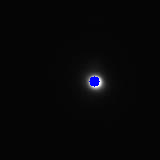

mu11,mu20,mu02,mu2 (20299.958333333256, 29382.583333333256, 16024.416666666628, 45406.99999999988)
(-0.8101041496260638, 0.586285993998349)
2D momonet around long axis: 44074.00449822548


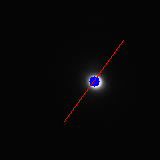

In [ ]:
ret,thresh = cv2.threshold(gray,109,255,cv2.THRESH_BINARY)
#cv2_imshow(thresh)
# 輪郭を抽出する。
contours, hierarchy = cv2.findContours(np.array(thresh,dtype=uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#Fill holes:塗りつぶし作業
#bin_img = ndimage.binary_fill_holes(bin_img).astype(int) * 255

Areas = []
if (bool(contours)==True):
    #面積(px*px)
    for i in contours:
      area = cv2.contourArea(i)
      Areas.append(area)

    ind = np.argmax(Areas)
    #print(contours)
    print(ind)
    cnt = contours[ind]

    mu=cv2.moments(cnt)
    gx=int(mu["m10"]/mu["m00"])
    gy=int(mu["m01"]/mu["m00"])
    print((gx,gy))
    cv2.circle(img,(gx,gy),5,color=[255,0,0],thickness=-1)
    cv2_imshow(img)

    #calculate 2d moment
    mu11=mu["m11"]-gx*gy*mu["m00"]
    mu20=mu["m20"]-gx**2*mu["m00"]
    mu02=mu["m02"]-gy**2*mu["m00"]
    mu2=mu20+mu02

    print('mu11,mu20,mu02,mu2',(mu11,mu20,mu02,mu2))

    #long-axis angle
    if (abs(mu20-mu02)>1e-7):
      theta = math.atan2(2*mu11,mu20-mu02)/2-np.pi/2
    else:
      theta = np.pi/2-np.pi/2

    sin = np.sin(theta)
    cos = np.cos(theta)
    print((sin,cos))
    #2d moment around long-axis
    mu_axis = mu20*sin**2-2*mu11*sin*cos+mu02*cos**2

    #plot long-axis in an image
    pt1_x = int(gx-50*cos)
    pt1_y = int(gy-50*sin)
    pt2_x = int(gx+50*cos)
    pt2_y = int(gy+50*sin)
    pt1 = (pt1_x,pt1_y)
    pt2 = (pt2_x,pt2_y)
    cv2.line(img, pt1, pt2, color=[0,0,255], thickness=1, lineType=cv2.LINE_8, shift=0)
    print('2D momonet around long axis:',mu_axis)

    cv2_imshow(img)



#For video analyses

In [ ]:
print(np.argmax.__doc__)

In [ ]:
import os
import glob
import csv

length=32
#src_img_dir="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_22_trim"
src_img_dir="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/1_1"
#フォルダに存在するファイルを取得する、0001.jpg~0005.jpg→{}/*.jpg
src_files=glob.glob("{}/*.jpg".format(src_img_dir))
src_files.sort()

#print(len(src_files), "image files")

#画像の保存ディレクトリ
#dst_img_dir='/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_22_trim/processed'
dst_img_dir='/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/1_1/processed'

#出力ファイル名
#filename='/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/22.csv'
filename='/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/1_1.csv'

#ファイルを作成
with open(filename,"w") as f:
  writer = csv.writer(f)
  writer.writerow(["hist1","hist2","hist3","hist4","hist5","long-axial angle","2d moment around cg","2d moment around long axis"])

if not os.path.exists(dst_img_dir):
  os.makedirs(dst_img_dir)

#重心位置
position_x=[]
position_y=[]

roi = []
x = []
y = []
count = 0

for i,file in enumerate(src_files): #index,components=enumerate(file)
  print(file)

  # 画像を読み込む。
  img=cv2.imread(file)
  img=np.array(img,dtype=uint8)

  # グレースケールに変換する。
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #threshold
  ret,thresh = cv2.threshold(gray,30,255,cv2.THRESH_BINARY)
  #find contours
  contours, hierarchy = cv2.findContours(np.array(thresh,dtype=uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


  Areas = []
  #detect laser area
  if (bool(contours)==True):
    #面積(px*px)
    for j in contours:
      area = cv2.contourArea(j)
      Areas.append(area)

    ind = np.argmax(Areas)
    cnt = contours[ind]

    mu=cv2.moments(cnt)
    #gravity center
    xg=int(mu["m10"]/mu["m00"])
    yg=int(mu["m01"]/mu["m00"])
    x.append(xg)
    y.append(yg)
    count+=1
    #for offline
    if count==3:
      break

sum_x = 0
sum_y = 0
for i in range(len(x)):
  sum_x += x[i]
  sum_y += y[i]
xg = int(sum_x/len(x))
yg = int(sum_y/len(y))
print((xg,yg))


#for standarzation
Hist = []
Theta = []
Mom_g = []
Mom_a = []


#calculate features
for i,file in enumerate(src_files): #index,components=enumerate(file)
  print(file)

  # 画像を読み込む。
  img=cv2.imread(file)
  #img=np.array(img,dtype=uint8)
  #img = raw_img[yg-length:yg+length,xg-length:xg+length,:]
  img = img[yg-length:yg+length,xg-length:xg+length]
  # グレースケールに変換する。
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  #calculate histgram : 5 bins
  hist_values = cv2.calcHist([gray],channels=[0],mask=None,histSize=[5],ranges=[0,256])
  #normalization
  #hist_values = hist_values/length**2
  hist_values = hist_values.tolist()
  Hist.append(hist_values)

  #threshold : max brightness/2
  ind = np.unravel_index(np.argmax(gray, axis=None), gray.shape)
  #print(gray)
  max = gray[ind]

  #ret,thresh = cv2.threshold(gray,max/2,255,cv2.THRESH_BINARY)
  ret,thresh = cv2.threshold(gray,30,255,cv2.THRESH_BINARY)
  #find contours
  contours, hierarchy = cv2.findContours(np.array(thresh,dtype=uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


  Areas = []
  #detect laser area
  if (bool(contours)==True):
    #面積(px*px)
    for j in contours:
      area = cv2.contourArea(j)
      Areas.append(area)

    ind = np.argmax(Areas)
    cnt = contours[ind]

    mu=cv2.moments(cnt)
    #gravity center
    gx=int(mu["m10"]/mu["m00"])
    gy=int(mu["m01"]/mu["m00"])

    #calculate 2d moment
    mu11=mu["m11"]-gx*gy*mu["m00"]
    mu20=mu["m20"]-gx**2*mu["m00"]
    mu02=mu["m02"]-gy**2*mu["m00"]
    mu2=mu20+mu02
    Mom_g.append(mu2)

    #long-axis angle
    if (abs(mu20-mu02)>1e-7):
      theta = math.atan2(2*mu11,mu20-mu02)/2-np.pi/2
    else:
      theta = np.pi/2-np.pi/2
    Theta.append(theta)

    sin = np.sin(theta)
    cos = np.cos(theta)

    #2d moment around long-axis
    mu_axis = mu20*sin**2-2*mu11*sin*cos+mu02*cos**2
    Mom_a.append(mu_axis)

    #plot long-axis in an image
    pt1_x = int(xg-20*cos)
    pt1_y = int(yg-20*sin)
    pt2_x = int(xg+20*cos)
    pt2_y = int(yg+20*sin)
    pt1 = (pt1_x,pt1_y)
    pt2 = (pt2_x,pt2_y)
    cv2.line(img, pt1, pt2, color=[0,0,255], thickness=3, lineType=cv2.LINE_8, shift=0)

    #write features into csv file
    #with open(filename,"a",newline='') as f:
    #  writer = csv.writer(f)
   #   writer.writerow([hist_values[0][0],hist_values[1][0],hist_values[2][0],hist_values[3][0],hist_values[4][0],theta,mu2,mu_axis])

    #動画作成用
    dst_file="{dir}/{index:04d}.jpg".format(dir=dst_img_dir,index=i+1)
    img = np.array(img, np.uint8)
    print(img.shape)
    cv2.imwrite(dst_file,img)



/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/1_1/0001.jpg
/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/1_1/0002.jpg
/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/1_1/0003.jpg
/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/1_1/0004.jpg
/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/1_1/0005.jpg
/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/1_1/0006.jpg
/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/1_1/0007.jpg
/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/1_1/0008.jpg
/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/1_1/0009.jpg
/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/1_1/0010.jpg
/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/1_1/0011.jpg
/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/1_1/0012.jpg
/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/1_1/0013.jpg
(95, 82)
/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/1_1/0001.jpg
/content/gdrive/My Drive/

#Standardization of Histgram

1
2
3
4
5


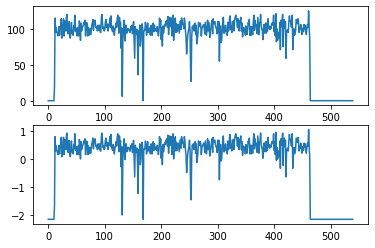

In [ ]:
import math

def mean(data):
  sum = 0
  for i in range(len(data)):
    sum = sum+data[i]
  ave = sum/len(data)
  return ave

def std(data,mean):
  sum = 0
  for i in range(len(data)):
    #print((data[i],mean))
    sum = sum+math.pow((data[i]-mean),2)
  cov = sum/len(data)
  std = math.pow(cov,0.5)
  return std

def transform(Hist,j):
  hist = []
  for i in range(len(Hist)):
    hist.append(Hist[i][j][0])
  return hist


def standard(data):
  mu = mean(data)
  sigma = std(data,mu)
  tmp = []
  if sigma == 0:
    return data
  else:
    for j in range(len(data)):
        z = (data[j]-mu)/sigma
        tmp.append(z)
    return tmp

Hist_2 = transform(Hist,1)
Hist_3 = transform(Hist,2)
Hist_4 = transform(Hist,3)
Hist_5 = transform(Hist,4)
print(1)
Hist2_std = standard(Hist_2)
print(2)
Hist3_std = standard(Hist_3)
print(3)
Hist4_std = standard(Hist_4)
print(4)
Hist5_std = standard(Hist_5)
print(5)

plt.subplot(2,1,1)
plt.plot(Hist_5)
plt.subplot(2,1,2)
plt.plot(Hist5_std)

#Standardization of Theta,Moment around gravity center and Moment around long axis

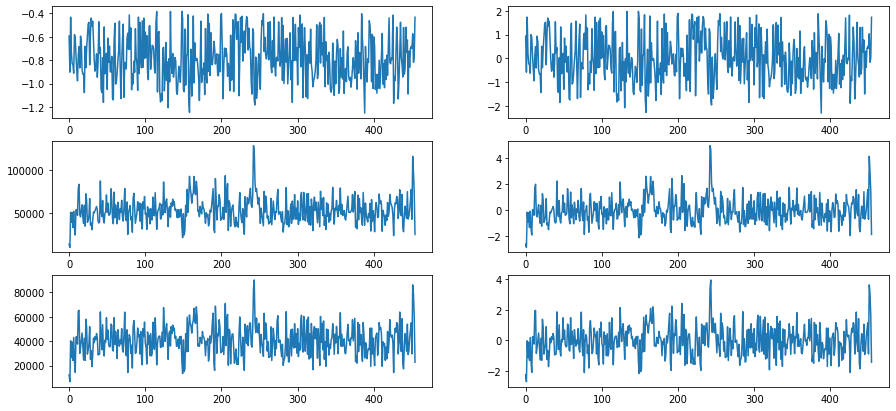

In [ ]:
Theta_std = standard(Theta)
Mom_g_std = standard(Mom_g)
Mom_a_std = standard(Mom_a)
plt.figure(figsize=(15,7))
plt.subplot(3,2,1)
plt.plot(Theta)
plt.subplot(3,2,2)
plt.plot(Theta_std)
plt.subplot(3,2,3)
plt.plot(Mom_g)
plt.subplot(3,2,4)
plt.plot(Mom_g_std)
plt.subplot(3,2,5)
plt.plot(Mom_a)
plt.subplot(3,2,6)
plt.plot(Mom_a_std)

#standardization and write data into csv file

In [ ]:
#出力ファイル名
filename='/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_27_trim/27.csv'

#ファイルを作成
with open(filename,"w") as f:
  writer = csv.writer(f)
  writer.writerow(["hist2","hist3","hist4","hist5","long-axial angle","2d moment around cg","2d moment around long axis"])

def std2csv(Hist,csv_file):
  #Histgram
  #Numpy array -> list
  Hist_2 = transform(Hist,1)
  Hist_3 = transform(Hist,2)
  Hist_4 = transform(Hist,3)
  Hist_5 = transform(Hist,4)
  #Standardization
  Hist2_std = standard(Hist_2)
  Hist3_std = standard(Hist_3)
  Hist4_std = standard(Hist_4)
  Hist5_std = standard(Hist_5)
  #Theta
  Theta_std = standard(Theta)
  #Moment around gravity center
  Mom_g_std = standard(Mom_g)
  #Momenta aroud long axis
  Mom_a_std = standard(Mom_a)

  #write features into csv file
  for i in range(len(Theta)):
    with open(filename,"a",newline='') as f:
      writer = csv.writer(f)
      writer.writerow([Hist2_std[i],Hist3_std[i],Hist4_std[i],Hist5_std[i],Theta_std[i],Mom_g_std[i],Mom_a_std[i]])

In [ ]:
std2csv(Hist,csv_file='/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_27_trim/27.csv')

#making demo video

In [ ]:
#処理後の画像を動画に変換する
import glob

dst_img_dir='/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_27_trim/processed'
src_img_dir=dst_img_dir

#フォルダに存在するファイルを取得する、0001.jpg~0005.jpg→{}/*.jpg
src_files=glob.glob("{}/*.jpg".format(src_img_dir))
src_files.sort()

#処理後の画像から動画を作る
!ffmpeg -framerate 30 -i "$src_img_dir/%04d.jpg" "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_27_trim/27.mp4"

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

#module of all procedure for 20221020

#Crop Image

In [ ]:
import os
import glob
def cropping(sec):
  src_img_dir="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/".format(sec)
  dst_img_dir='/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed_2'.format(sec)
  if not os.path.exists(dst_img_dir):
    os.makedirs(dst_img_dir)

  length = 32
  #フォルダに存在するファイルを取得する、0001.jpg~0005.jpg→{}/*.jpg
  src_files=glob.glob("{}/*.jpg".format(src_img_dir))
  src_files.sort()
  #initialization
  roi = []
  x = []
  y = []
  count = 0
  sum_x = 0
  sum_y = 0
  xg=0
  yg=0

  for i,file in enumerate(src_files): #index,components=enumerate(file)
    # 画像を読み込む。
    img=cv2.imread(file)
    img=np.array(img,dtype=uint8)

    # グレースケールに変換する。
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #threshold
    ret,thresh = cv2.threshold(gray,10,255,cv2.THRESH_BINARY)
    #find contours
    contours, hierarchy = cv2.findContours(np.array(thresh,dtype=uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    Areas = []
    #detect laser area
    if (bool(contours)==True):
      #面積(px*px)
      for j in contours:
        area = cv2.contourArea(j)
        Areas.append(area)

      ind = np.argmax(Areas)
      cnt = contours[ind]

      mu=cv2.moments(cnt)
      if mu["m00"] == 0:
        pass
      elif mu["m00"] != 0:
        #gravity center
        xg=int(mu["m10"]/mu["m00"])
        yg=int(mu["m01"]/mu["m00"])

        if xg < 32 or xg >223 or  yg <32 or yg >223:
          xg = x_tmp
          yg = y_tmp
    else:
      xg = x_tmp
      yg = y_tmp

    x_tmp = xg
    y_tmp = yg
    print((xg,yg))
    gray = gray[yg-length:yg+length,xg-length:xg+length]
    dst_file="{dir}/{index:04d}.jpg".format(dir=dst_img_dir,index=i+1)
    gray = np.array(gray, np.uint8)
    cv2.imwrite(dst_file,gray)


In [ ]:
cropping(38)

In [ ]:
import os
import glob

def roi(sec):
  src_img_dir="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/".format(sec)

  #フォルダに存在するファイルを取得する、0001.jpg~0005.jpg→{}/*.jpg
  src_files=glob.glob("{}/*.jpg".format(src_img_dir))
  src_files.sort()
  #initialization
  roi = []
  x = []
  y = []
  count = 0
  sum_x = 0
  sum_y = 0
  for i,file in enumerate(src_files): #index,components=enumerate(file)

    # 画像を読み込む。
    img=cv2.imread(file)
    img=np.array(img,dtype=uint8)

    # グレースケールに変換する。
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #threshold
    ret,thresh = cv2.threshold(gray,10,255,cv2.THRESH_BINARY)
    #find contours
    contours, hierarchy = cv2.findContours(np.array(thresh,dtype=uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    Areas = []
    #detect laser area
    if (bool(contours)==True):
      #面積(px*px)
      for j in contours:
        area = cv2.contourArea(j)
        Areas.append(area)

      ind = np.argmax(Areas)
      cnt = contours[ind]

      mu=cv2.moments(cnt)
      if mu["m00"] == 0:
        pass
      elif mu["m00"] != 0:
        #gravity center
        xg=int(mu["m10"]/mu["m00"])
        yg=int(mu["m01"]/mu["m00"])
        x.append(xg)
        y.append(yg)
        count+=1
      #for offline
      if count==30:
        break

  for i in range(len(x)):
    sum_x += x[i]
    sum_y += y[i]
  xg = int(sum_x/len(x))
  yg = int(sum_y/len(y))
  return xg,yg


def cropping_2(sec):
  src_img_dir="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/".format(sec)
  dst_img_dir='/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed_2'.format(sec)
  if not os.path.exists(dst_img_dir):
    os.makedirs(dst_img_dir)

  #フォルダに存在するファイルを取得する、0001.jpg~0005.jpg→{}/*.jpg
  src_files=glob.glob("{}/*.jpg".format(src_img_dir))
  src_files.sort()


  length = 32
  xg,yg = roi(sec)

  print((xg,yg))

  for i,file in enumerate(src_files): #index,components=enumerate(file)
    # 画像を読み込む。
    img=cv2.imread(file)
    img=np.array(img,dtype=uint8)

    # グレースケールに変換する。
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    gray = gray[yg-length:yg+length,xg-length:xg+length]
    dst_file="{dir}/{index:04d}.jpg".format(dir=dst_img_dir,index=i+1)
    gray = np.array(gray, np.uint8)
    cv2.imwrite(dst_file,gray)

In [ ]:
for i in range(21,45):
  print(i)
  cropping_2(i)


21
(86, 82)
22
(87, 82)
23
(87, 82)
24
(87, 82)
25
(87, 82)
26
(87, 80)
27
(88, 80)
28
(87, 80)
29
(90, 79)
30
(87, 81)
31
(87, 80)
32
(90, 79)
33
(87, 80)
34
(88, 80)
35
(88, 79)
36
(88, 79)
37
(87, 80)
38
(87, 80)
39
(87, 80)
40
(86, 80)
41
(89, 84)
42
(86, 80)
43
(88, 80)
44
(88, 80)


#Function : ROI detection

In [ ]:
import glob
import os

def roi(sec):
  src_img_dir="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/".format(sec)

  #フォルダに存在するファイルを取得する、0001.jpg~0005.jpg→{}/*.jpg
  src_files=glob.glob("{}/*.jpg".format(src_img_dir))
  src_files.sort()
  #initialization
  roi = []
  x = []
  y = []
  count = 0
  sum_x = 0
  sum_y = 0
  for i,file in enumerate(src_files): #index,components=enumerate(file)

    # 画像を読み込む。
    img=cv2.imread(file)
    img=np.array(img,dtype=uint8)

    # グレースケールに変換する。
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #threshold
    ret,thresh = cv2.threshold(gray,30,255,cv2.THRESH_BINARY)
    #find contours
    contours, hierarchy = cv2.findContours(np.array(thresh,dtype=uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    Areas = []
    #detect laser area
    if (bool(contours)==True):
      #面積(px*px)
      for j in contours:
        area = cv2.contourArea(j)
        Areas.append(area)

      ind = np.argmax(Areas)
      cnt = contours[ind]

      mu=cv2.moments(cnt)
      if mu["m00"] == 0:
        pass
      elif mu["m00"] != 0:
        #gravity center
        xg=int(mu["m10"]/mu["m00"])
        yg=int(mu["m01"]/mu["m00"])
        x.append(xg)
        y.append(yg)
        count+=1
      #for offline
      if count==30:
        break

  for i in range(len(x)):
    sum_x += x[i]
    sum_y += y[i]
  xg = int(sum_x/len(x))
  yg = int(sum_y/len(y))
  return xg,yg

In [ ]:
roi_x,roi_y = roi(21)
print((roi_x,roi_y))

(86, 82)


#Function:Extraction of Features

In [ ]:
def extract_feature(sec,length,save_dir):
  src_img_dir="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim".format(sec)
  #src_img_dir="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed_2".format(sec)

  #フォルダに存在するファイルを取得する、0001.jpg~0005.jpg→{}/*.jpg
  src_files=glob.glob("{}/*.jpg".format(src_img_dir))
  src_files.sort()
  dir = '/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed_2'.format(sec)
  num = sum(os.path.isfile(os.path.join(dir,name)) for name in os.listdir(dir))
  print('data in dir:{},enumerate:{}'.format(num,enumerate(src_files)))

  #for standarzation
  Hist = []
  Theta = []
  sum_Theta = 0
  Mom_g = []
  sum_Mom_g = 0
  Mom_a = []
  sum_Mom_a = 0

  sum_gx = 0
  sum_gy = 0
  for i,file in enumerate(src_files): #index,components=enumerate(file)
    #print(file)

    # 画像を読み込む。
    img=cv2.imread(file)

    #cropping and save
    #img = img[yg-length:yg+length,xg-length:xg+length]
    #dst_file="{dir}/{index:04d}.jpg".format(dir=save_dir,index=i+1)
    #img = np.array(gray, np.uint8)
    #cv2.imwrite(dst_file,img)

    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #calculate histgram : 5 bins
    hist_values = cv2.calcHist([gray],channels=[0],mask=None,histSize=[5],ranges=[0,256])
    #normalization
    #hist_values = hist_values/length**2
    hist_values = hist_values.tolist()
    Hist.append(hist_values)

    #threshold : max brightness/2
    ind = np.unravel_index(np.argmax(gray, axis=None), gray.shape)
    #print(gray)
    max = gray[ind]

    #ret,thresh = cv2.threshold(gray,max/2,255,cv2.THRESH_BINARY)
    ret,thresh = cv2.threshold(gray,10,255,cv2.THRESH_BINARY)
    #find contours
    contours, hierarchy = cv2.findContours(np.array(thresh,dtype=uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    Areas = []
    #detect laser area
    if (bool(contours)==True):
      #面積(px*px)
      for j in contours:
        area = cv2.contourArea(j)
        Areas.append(area)

      ind = np.argmax(Areas)
      cnt = contours[ind]

      mu=cv2.moments(cnt)
      if mu["m00"] != 0:
        #gravity center
        gx=int(mu["m10"]/mu["m00"])
        gy=int(mu["m01"]/mu["m00"])

      else:
        gx = sum_gx/i
        gy = sum_gy/i

      sum_gx += gx
      sum_gy += gy

      #calculate 2d moment
      mu11=mu["m11"]-gx*gy*mu["m00"]
      mu20=mu["m20"]-gx**2*mu["m00"]
      mu02=mu["m02"]-gy**2*mu["m00"]
      mu2=mu20+mu02
      Mom_g.append(mu2)

      #long-axis angle
      if (abs(mu20-mu02)>1e-7):
        theta = math.atan2(2*mu11,mu20-mu02)/2#-np.pi/2
      else:
        theta = np.pi/2#-np.pi/2
      Theta.append(theta)

      sin = np.sin(theta)
      cos = np.cos(theta)

      #2d moment around long-axis
      mu_axis = mu20*sin**2-2*mu11*sin*cos+mu02*cos**2
      Mom_a.append(mu_axis)

      sum_Theta += theta
      sum_Mom_g += mu2
      sum_Mom_a += mu_axis

    else:
      ave_theta = sum_Theta/i
      ave_Mom_g = sum_Mom_g/i
      ave_Mom_a = sum_Mom_a/i

      sum_Theta += ave_theta
      sum_Mom_g += ave_Mom_g
      sum_Mom_a += ave_Mom_a

      Theta.append(ave_theta)
      Mom_g.append(ave_Mom_g)
      Mom_a.append(ave_Mom_a)

  return Hist,Theta,Mom_g,Mom_a

#Function: Standardization&Write to csv file

In [ ]:
import math

def mean(data):
  sum = 0
  for i in range(len(data)):
    sum = sum+data[i]
  ave = sum/len(data)
  return ave

def std(data,mean):
  sum = 0
  #print(len(data))
  for i in range(len(data)):
    sum = sum+math.pow((data[i]-mean),2)
  cov = sum/len(data)
  std = math.pow(cov,0.5)
  return std

def transform(Hist,j):
  hist = []
  for i in range(len(Hist)):
    hist.append(Hist[i][j][0])
  return hist


def standard(data):
  mu = mean(data)
  sigma = std(data,mu)
  print(sigma)
  tmp = []
  if sigma == 0:
    #print('sigma=0')
    tmp = np.zeros((len(data)))
    tmp = tmp.tolist()
  elif sigma != 0:
    #print('standardization')
    for j in range(len(data)):
        z = (data[j]-mu)/sigma
        tmp.append(z)
  return tmp

def std2csv(Hist,Theta,Mom_g,Mom_a,csv_file):
  #Histgram
  #Numpy array -> list
  Hist_2 = transform(Hist,1)
  Hist_3 = transform(Hist,2)
  Hist_4 = transform(Hist,3)
  Hist_5 = transform(Hist,4)
  #Standardization
  Hist2_std = standard(Hist_2)
  Hist3_std = standard(Hist_3)
  Hist4_std = standard(Hist_4)
  Hist5_std = standard(Hist_5)
  #Theta
  Theta_std = standard(Theta)
  #Moment around gravity center
  Mom_g_std = standard(Mom_g)
  #Momenta aroud long axis
  Mom_a_std = standard(Mom_a)

  #write features into csv file
  print(len(Hist))
  for i in range(len(Hist)):
    with open(csv_file,"a",newline='') as f:
      writer = csv.writer(f)
      writer.writerow([Hist2_std[i],Hist3_std[i],Hist4_std[i],Hist5_std[i],Theta_std[i],Mom_g_std[i],Mom_a_std[i]])

def data2std(Hist,Theta,Mom_g,Mom_a):
  #Histgram
  #Numpy array -> list
  Hist_2 = transform(Hist,1)
  Hist_3 = transform(Hist,2)
  Hist_4 = transform(Hist,3)
  Hist_5 = transform(Hist,4)
  #Standardization
  Hist2_std = standard(Hist_2)
  Hist3_std = standard(Hist_3)
  Hist4_std = standard(Hist_4)
  Hist5_std = standard(Hist_5)
  #Theta
  Theta_std = standard(Theta)
  #Moment around gravity center
  Mom_g_std = standard(Mom_g)
  #Momenta aroud long axis
  Mom_a_std = standard(Mom_a)

  return  Hist2_std,Hist3_std,Hist4_std,Hist5_std,Theta_std,Mom_g_std,Mom_a_std

#main function

#for 20221020

In [ ]:
import csv
def Main(sec):

  spatter = [[],
             [54],
             [],
             [1, 26, 47, 64, 120, 209, 254, 306, 329, 332],
             [],
             [7, 51, 126, 140, 583, 588, 645, 649, 712, 716, 787],
             [],[17, 193],
             [],[49, 54, 69, 71, 197, 251, 261, 277, 290, 306],
             [61, 75, 124, 166, 168, 176, 247, 393, 451, 468, 529, 599, 668, 700],[52, 108, 115 ,186, 189, 191, 224, 229, 233, 247, 249, 269, 353, 418, 424, 473, 499, 514, 559, 562, 573, 582, 587, 616, 661, 724],
             [19 ,31 ,88 ,112 ],[6],
             [30 ,39 ,69 ,89 ,116, 137 ,149 ,338, 356 ],[59, 84 ,88 ,97 ,110 ,113 ,119 ,124 ,136 ,171 ,214 ,221 ,226 ,246 ,250 ,257 ,280 ,282 ,365 ,368 ,379 ,385],
             [3, 6 ,21 ,45 ,55 ,80, 92, 97 ,114, 122 ,159, 167, 183 ,218, 222, 266, 289, 333, 342 ,361, 400, 439 ,446 ,501 ,524 ,530 ,546 ,566 ,594 ,598 ,627 ,679],[7, 12 ,22 ,24 ,42 ,58 ,61 ,63 ,67 ,71 ,78, 82 ,86 ,127, 145 ,147, 150, 154 ,207 ,212, 221, 226 ,248 ,252 ,257 ,282 ,285 ,302 ,321 ,334 ,336 ,341 ,365 ,385 ,393, 481 ,491 ,494 ,511 ,520 ,563 ,577 ,587 ,594 ,616 ,624 ,630 ,635 ,637 ,641 ,677 ,684 ,699 ,703 ,717 ,726 ,766 ,772],
             [76, 165, 180],[3, 90, 127, 141],
             [27, 42, 77, 99, 113, 129, 133, 137, 141, 151, 154, 160 ,191, 194, 206 ,209 ,235 ,264, 282, 292, 309, 312, 316, 323 ,338 ,370 ,377],[11, 22 ,27 ,29, 32, 59, 90, 94, 97, 108, 112, 120, 123, 127 ,147 ,153, 155, 176, 180 ,185, 216 ,222 ,227 ,232 ,245 ,254 ,305 ,307, 314 ,317 ,340, 404],
             [1, 5 ,13 ,32 ,51 ,59, 72, 101 ,123, 137 ,151 ,162 ,185 ,242 ,264 ,275 ,284 ,286 ,313 ,320 ,362 ,369, 382 ,389 ,426, 460, 505, 529, 540, 554, 603 ,619 ,636 ,664, 695, 705, 714 ,731 ,739, 763 ,772 ,777 ],[20, 48 ,51 ,57 ,62 ,64 ,72 ,78, 80, 90, 93, 137, 150, 163, 172, 182, 194 ,204 ,232, 238 ,243 ,259 ,269 ,281 ,286, 297, 307 ,330 ,339 ,358, 365, 367, 372 ,384 ,398 ,402 ,421 ,429 ,438, 441, 448 ,468 ,475 ,477, 492 ,500 ,506 ,509 ,523, 535, 550 ,562, 594 ,638 ,673 ,675 ,702 ,724 ,727]
           ]

  length=32
  src_img_dir="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim".format(sec)

  #フォルダに存在するファイルを取得する、0001.jpg~0005.jpg→{}/*.jpg
  src_files=glob.glob("{}/*.jpg".format(src_img_dir))
  src_files.sort()

  #print(len(src_files), "image files")

  #画像の保存ディレクトリ
  dst_img_dir='/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed_2'.format(sec)
  if not os.path.exists(dst_img_dir):
    os.makedirs(dst_img_dir)

  #出力ファイル名
  filename='/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_value.csv'.format(sec)

  #ファイルを作成
  #with open(filename,"w") as f:
  #  writer = csv.writer(f)
  #  writer.writerow(["hist1","hist2","hist3","hist4","long-axial angle","2d moment around cg","2d moment around long axis"])

  #extract ROI
  #xg,yg = roi(sec)
  #,Cropping Images and save, and Calculate features
  Hist,Theta,Mom_g,Mom_a = extract_feature(sec,length=length,save_dir = dst_img_dir)
  #standardize feature and write them to csv file
  #std2csv(Hist,Theta,Mom_g,Mom_a,csv_file=filename)

  #for including spatter or non-spatter
  with open(filename,"w") as f:
    writer = csv.writer(f)
    writer.writerow(["hist1","hist2","hist3","hist4","long-axial angle","2d moment around cg","2d moment around long axis"])
    #with spatter label
    #writer.writerow(["spatter","hist1","hist2","hist3","hist4","long-axial angle","2d moment around cg","2d moment around long axis"])

  Hist_2 = transform(Hist,1)
  Hist_3 = transform(Hist,2)
  Hist_4 = transform(Hist,3)
  Hist_5 = transform(Hist,4)

  #standardization
  #Hist2_std,Hist3_std,Hist4_std,Hist5_std,Theta_std,Mom_g_std,Mom_a_std = data2std(Hist,Theta,Mom_g,Mom_a)

  for i in range(len(Hist)):
    with open(filename,"a",newline='') as f:
      writer = csv.writer(f)
      writer.writerow([Hist_2[i],Hist_3[i],Hist_4[i],Hist_5[i],Theta[i],Mom_g[i],Mom_a[i]])
      #for standardized data
      #writer.writerow([Hist2_std[i],Hist3_std[i],Hist4_std[i],Hist5_std[i],Theta_std[i],Mom_g_std[i],Mom_a_std[i]])
  """
  #with spatter label
  for i in range(len(Hist)):
    with open(filename,"a",newline='') as f:
      writer = csv.writer(f)
      if (((i+1) in spatter[sec-21]) or (i in spatter[sec-21]) or ((i-1) in spatter[sec-21]) or ((i-2) in spatter[sec-21]) or ((i-3) in spatter[sec-21]) or ((i-4) in spatter[sec-21]) or ((i-5) in spatter[sec-21]) or ((i-6) in spatter[sec-21]) or ((i-7) in spatter[sec-21])): #frame number is (i+1)
        writer.writerow([1,Hist2_std[i],Hist3_std[i],Hist4_std[i],Hist5_std[i],Theta_std[i],Mom_g_std[i],Mom_a_std[i]])
      else:
        writer.writerow([0,Hist2_std[i],Hist3_std[i],Hist4_std[i],Hist5_std[i],Theta_std[i],Mom_g_std[i],Mom_a_std[i]])
  """

In [ ]:
for i in range(21,45):
  print(i)
  if i == 42:
    continue
  else:
    Main(i)

21
data in dir:244,enumerate:<enumerate object at 0x7f04b0cac700>
22
data in dir:448,enumerate:<enumerate object at 0x7f04b0c34400>
23
data in dir:895,enumerate:<enumerate object at 0x7f04b0c3de80>
24
data in dir:245,enumerate:<enumerate object at 0x7f04b0cacf40>
25
data in dir:448,enumerate:<enumerate object at 0x7f04b0c43d40>
26
data in dir:863,enumerate:<enumerate object at 0x7f04c5f8bfc0>
27
data in dir:235,enumerate:<enumerate object at 0x7f04b0e1b4c0>
28
data in dir:430,enumerate:<enumerate object at 0x7f04b0b91900>
29
data in dir:857,enumerate:<enumerate object at 0x7f04b0e14700>
30
data in dir:233,enumerate:<enumerate object at 0x7f04b0e185c0>
31
data in dir:312,enumerate:<enumerate object at 0x7f04b0bf0680>
32
data in dir:880,enumerate:<enumerate object at 0x7f04b0bf0c00>
33
data in dir:236,enumerate:<enumerate object at 0x7f04b6aac0c0>
34
data in dir:434,enumerate:<enumerate object at 0x7f04b6a8f240>
35
data in dir:866,enumerate:<enumerate object at 0x7f04b0d19b80>
36
data in

In [ ]:
import csv
def Main_2():

  spatter = [[],
             [54],
             [],
             [1, 26, 47, 64, 120, 209, 254, 306, 329, 332],
             [],
             [7, 51, 126, 140, 583, 588, 645, 649, 712, 716, 787],
             [],[17, 193],
             [],[49, 54, 69, 71, 197, 251, 261, 277, 290, 306],
             [61, 75, 124, 166, 168, 176, 247, 393, 451, 468, 529, 599, 668, 700],[52, 108, 115 ,186, 189, 191, 224, 229, 233, 247, 249, 269, 353, 418, 424, 473, 499, 514, 559, 562, 573, 582, 587, 616, 661, 724],
             [19 ,31 ,88 ,112 ],[6],
             [30 ,39 ,69 ,89 ,116, 137 ,149 ,338, 356 ],[59, 84 ,88 ,97 ,110 ,113 ,119 ,124 ,136 ,171 ,214 ,221 ,226 ,246 ,250 ,257 ,280 ,282 ,365 ,368 ,379 ,385],
             [3, 6 ,21 ,45 ,55 ,80, 92, 97 ,114, 122 ,159, 167, 183 ,218, 222, 266, 289, 333, 342 ,361, 400, 439 ,446 ,501 ,524 ,530 ,546 ,566 ,594 ,598 ,627 ,679],[7, 12 ,22 ,24 ,42 ,58 ,61 ,63 ,67 ,71 ,78, 82 ,86 ,127, 145 ,147, 150, 154 ,207 ,212, 221, 226 ,248 ,252 ,257 ,282 ,285 ,302 ,321 ,334 ,336 ,341 ,365 ,385 ,393, 481 ,491 ,494 ,511 ,520 ,563 ,577 ,587 ,594 ,616 ,624 ,630 ,635 ,637 ,641 ,677 ,684 ,699 ,703 ,717 ,726 ,766 ,772],
             [76, 165, 180],[3, 90, 127, 141],
             [27, 42, 77, 99, 113, 129, 133, 137, 141, 151, 154, 160 ,191, 194, 206 ,209 ,235 ,264, 282, 292, 309, 312, 316, 323 ,338 ,370 ,377],[11, 22 ,27 ,29, 32, 59, 90, 94, 97, 108, 112, 120, 123, 127 ,147 ,153, 155, 176, 180 ,185, 216 ,222 ,227 ,232 ,245 ,254 ,305 ,307, 314 ,317 ,340, 404],
             [1, 5 ,13 ,32 ,51 ,59, 72, 101 ,123, 137 ,151 ,162 ,185 ,242 ,264 ,275 ,284 ,286 ,313 ,320 ,362 ,369, 382 ,389 ,426, 460, 505, 529, 540, 554, 603 ,619 ,636 ,664, 695, 705, 714 ,731 ,739, 763 ,772 ,777 ],[20, 48 ,51 ,57 ,62 ,64 ,72 ,78, 80, 90, 93, 137, 150, 163, 172, 182, 194 ,204 ,232, 238 ,243 ,259 ,269 ,281 ,286, 297, 307 ,330 ,339 ,358, 365, 367, 372 ,384 ,398 ,402 ,421 ,429 ,438, 441, 448 ,468 ,475 ,477, 492 ,500 ,506 ,509 ,523, 535, 550 ,562, 594 ,638 ,673 ,675 ,702 ,724 ,727]
           ]

  length=32

  #出力ファイル名
  filename='/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/train_value.csv'
  filename_test='/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/test_value.csv'

  with open(filename,"w") as f:
      writer = csv.writer(f)
      writer.writerow(["hist1","hist2","hist3","hist4","long-axial angle","2d moment around cg","2d moment around long axis"])

  with open(filename_test,"w") as f:
      writer = csv.writer(f)
      writer.writerow(["hist1","hist2","hist3","hist4","long-axial angle","2d moment around cg","2d moment around long axis"])

  for sec in range(21,45):
    if sec == 42:
      pass
    else:
      print(sec)
      src_img_dir="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim".format(sec)

      #フォルダに存在するファイルを取得する、0001.jpg~0005.jpg→{}/*.jpg
      src_files=glob.glob("{}/*.jpg".format(src_img_dir))
      src_files.sort()

      #print(len(src_files), "image files")

      #画像の保存ディレクトリ
      dst_img_dir='/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed_2'.format(sec)
      if not os.path.exists(dst_img_dir):
        os.makedirs(dst_img_dir)

      #,Cropping Images and save, and Calculate features
      Hist,Theta,Mom_g,Mom_a = extract_feature(sec,length=length,save_dir = dst_img_dir)
      #standardize feature and write them to csv file
      #std2csv(Hist,Theta,Mom_g,Mom_a,csv_file=filename)

      Hist_2 = transform(Hist,1)
      Hist_3 = transform(Hist,2)
      Hist_4 = transform(Hist,3)
      Hist_5 = transform(Hist,4)

      #standardization
      #Hist2_std,Hist3_std,Hist4_std,Hist5_std,Theta_std,Mom_g_std,Mom_a_std = data2std(Hist,Theta,Mom_g,Mom_a)
      if sec == 23 or sec == 39 or sec == 43:
        for i in range(len(Hist)-20):
          with open(filename_test,"a",newline='') as f:
            writer = csv.writer(f)
            writer.writerow([Hist_2[i],Hist_3[i],Hist_4[i],Hist_5[i],Theta[i],Mom_g[i],Mom_a[i]])
      else:
        for i in range(len(Hist)-20):
          with open(filename,"a",newline='') as f:
            writer = csv.writer(f)
            writer.writerow([Hist_2[i],Hist_3[i],Hist_4[i],Hist_5[i],Theta[i],Mom_g[i],Mom_a[i]])
        #for standardized data
        #writer.writerow([Hist2_std[i],Hist3_std[i],Hist4_std[i],Hist5_std[i],Theta_std[i],Mom_g_std[i],Mom_a_std[i]])

In [ ]:
Main_2()

21
data in dir:244,enumerate:<enumerate object at 0x7f04d0448bc0>
22
data in dir:448,enumerate:<enumerate object at 0x7f04b0b92d00>
23
data in dir:895,enumerate:<enumerate object at 0x7f04c5f65ec0>
24
data in dir:245,enumerate:<enumerate object at 0x7f04b0e10e40>
25
data in dir:448,enumerate:<enumerate object at 0x7f04b0ad9d40>
26
data in dir:863,enumerate:<enumerate object at 0x7f04b0ace5c0>
27
data in dir:235,enumerate:<enumerate object at 0x7f04b0cac240>
28
data in dir:430,enumerate:<enumerate object at 0x7f04b0b26bc0>
29
data in dir:857,enumerate:<enumerate object at 0x7f04b0ae1340>
30
data in dir:233,enumerate:<enumerate object at 0x7f04b2293c00>
31
data in dir:312,enumerate:<enumerate object at 0x7f04b0d7af80>
32
data in dir:880,enumerate:<enumerate object at 0x7f04b0b351c0>
33
data in dir:236,enumerate:<enumerate object at 0x7f04b0ad4280>
34
data in dir:434,enumerate:<enumerate object at 0x7f04c6b39140>
35
data in dir:866,enumerate:<enumerate object at 0x7f04b0e85c40>
36
data in

In [ ]:
import pandas as pd
for sec in range(21,45):
  file = pd.read_csv(filepath_or_buffer = '/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_value.csv'.format(sec))
  value = file.values
  count = 0
  for j in range(len(value)):
    if value[i,0] == 1:
      count+=1
  print('{}\'s spatter num is {}'.format(sec,count))

21's spatter num is 0
22's spatter num is 0
23's spatter num is 0
24's spatter num is 0
25's spatter num is 0
26's spatter num is 0
27's spatter num is 0
28's spatter num is 0
29's spatter num is 0
30's spatter num is 0
31's spatter num is 0
32's spatter num is 0
33's spatter num is 0
34's spatter num is 0
35's spatter num is 866
36's spatter num is 0
37's spatter num is 440
38's spatter num is 883
39's spatter num is 0
40's spatter num is 0
41's spatter num is 889


FileNotFoundError: ignored

#for 20220401/20220603

In [ ]:
import glob
import os

def roi(sec,div):
  src_img_dir="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}".format(sec,div)

  #フォルダに存在するファイルを取得する、0001.jpg~0005.jpg→{}/*.jpg
  src_files=glob.glob("{}/*.jpg".format(src_img_dir))
  src_files.sort()
  #initialization
  roi = []
  x = []
  y = []
  count = 0
  sum_x = 0
  sum_y = 0
  for i,file in enumerate(src_files): #index,components=enumerate(file)

    # 画像を読み込む。
    img=cv2.imread(file)
    img=np.array(img,dtype=uint8)

    # グレースケールに変換する。
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #threshold
    ret,thresh = cv2.threshold(gray,30,255,cv2.THRESH_BINARY)
    #find contours
    contours, hierarchy = cv2.findContours(np.array(thresh,dtype=uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    Areas = []
    #detect laser area
    if (bool(contours)==True):
      #面積(px*px)
      for j in contours:
        area = cv2.contourArea(j)
        Areas.append(area)

      ind = np.argmax(Areas)
      cnt = contours[ind]

      mu=cv2.moments(cnt)
      if Areas[ind] > 500:
        if mu["m00"] == 0:
          pass
        elif mu["m00"] != 0:
          #gravity center
          xg=int(mu["m10"]/mu["m00"])
          yg=int(mu["m01"]/mu["m00"])
          x.append(xg)
          y.append(yg)
          count+=1
        #for offline
      else:
        pass
      if count==3:
        break

  for i in range(len(x)):
    sum_x += x[i]
    sum_y += y[i]
  xg = int(sum_x/len(x))
  yg = int(sum_y/len(y))
  return xg,yg

In [ ]:
def extract_feature(sec,div,xg,yg,length,save_dir):
  src_img_dir="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画20220401/{}_{}".format(sec,div)

  #フォルダに存在するファイルを取得する、0001.jpg~0005.jpg→{}/*.jpg
  src_files=glob.glob("{}/*.jpg".format(src_img_dir))
  src_files.sort()

  #for standarzation
  Hist = []
  Theta = []
  Mom_g = []
  Mom_a = []

  for i,file in enumerate(src_files): #index,components=enumerate(file)
    #print(file)

    # 画像を読み込む。
    img=cv2.imread(file)

    #cropping and save
    img = img[yg-length:yg+length,xg-length:xg+length]
    dst_file="{dir}/{index:04d}.jpg".format(dir=save_dir,index=i+1)
    #img = np.array(gray, np.uint8)
    cv2.imwrite(dst_file,img)

    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #calculate histgram : 5 bins
    hist_values = cv2.calcHist([gray],channels=[0],mask=None,histSize=[5],ranges=[0,256])
    #normalization
    #hist_values = hist_values/length**2
    hist_values = hist_values.tolist()
    Hist.append(hist_values)

    #threshold : max brightness/2
    ind = np.unravel_index(np.argmax(gray, axis=None), gray.shape)
    #print(gray)
    max = gray[ind]

    #ret,thresh = cv2.threshold(gray,max/2,255,cv2.THRESH_BINARY)
    ret,thresh = cv2.threshold(gray,30,255,cv2.THRESH_BINARY)
    #find contours
    contours, hierarchy = cv2.findContours(np.array(thresh,dtype=uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    Areas = []
    #detect laser area
    if (bool(contours)==True):
      #面積(px*px)
      for j in contours:
        area = cv2.contourArea(j)
        Areas.append(area)

      ind = np.argmax(Areas)
      cnt = contours[ind]

      mu=cv2.moments(cnt)
      #gravity center
      gx=int(mu["m10"]/mu["m00"])
      gy=int(mu["m01"]/mu["m00"])

      #calculate 2d moment
      mu11=mu["m11"]-gx*gy*mu["m00"]
      mu20=mu["m20"]-gx**2*mu["m00"]
      mu02=mu["m02"]-gy**2*mu["m00"]
      mu2=mu20+mu02
      Mom_g.append(mu2)

      #long-axis angle
      if (abs(mu20-mu02)>1e-7):
        theta = math.atan2(2*mu11,mu20-mu02)/2-np.pi/2
      else:
        theta = np.pi/2-np.pi/2
      Theta.append(theta)

      sin = np.sin(theta)
      cos = np.cos(theta)

      #2d moment around long-axis
      mu_axis = mu20*sin**2-2*mu11*sin*cos+mu02*cos**2
      Mom_a.append(mu_axis)

  return Hist,Theta,Mom_g,Mom_a

In [ ]:
import math

def mean(data):
  sum = 0
  print(len(data))
  for i in range(len(data)):
      sum = sum+data[i]
  ave = sum/len(data)
  return ave

def std(data,mean):
  sum = 0
  for i in range(len(data)):
    sum = sum+math.pow((data[i]-mean),2)
  cov = sum/len(data)
  std = math.pow(cov,0.5)
  return std

def transform(Hist,j):
  hist = []
  for i in range(len(Hist)):
    hist.append(Hist[i][j][0])
  return hist


def standard(data):
  mu = mean(data)
  sigma = std(data,mu)
  print(sigma)
  tmp = []
  if sigma == 0:
    print('sigma=0')
    tmp = np.zeros((len(data),1))
    tmp = tmp.tolist()
  elif sigma != 0:
    print('standardization')
    for j in range(len(data)):
        z = (data[j]-mu)/sigma
        tmp.append(z)
  return tmp

def std2csv(Hist,Theta,Mom_g,Mom_a,csv_file):
  #Histgram
  #Numpy array -> list
  Hist_2 = transform(Hist,1)
  Hist_3 = transform(Hist,2)
  Hist_4 = transform(Hist,3)
  Hist_5 = transform(Hist,4)
  #Standardization
  Hist2_std = standard(Hist_2)
  Hist3_std = standard(Hist_3)
  Hist4_std = standard(Hist_4)
  Hist5_std = standard(Hist_5)
  #Theta
  Theta_std = standard(Theta)
  #Moment around gravity center
  Mom_g_std = standard(Mom_g)
  #Momenta aroud long axis
  Mom_a_std = standard(Mom_a)

  #write features into csv file
  for i in range(len(Theta)):
    with open(csv_file,"a",newline='') as f:
      writer = csv.writer(f)
      writer.writerow([Hist2_std[i],Hist3_std[i],Hist4_std[i],Hist5_std[i],Theta_std[i],Mom_g_std[i],Mom_a_std[i]])

In [ ]:
import csv
def Main_0401(sec,div):
  length=32
  src_img_dir="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}".format(sec,div)

  #フォルダに存在するファイルを取得する、0001.jpg~0005.jpg→{}/*.jpg
  src_files=glob.glob("{}/*.jpg".format(src_img_dir))
  src_files.sort()

  #print(len(src_files), "image files")

  #画像の保存ディレクトリ
  dst_img_dir='/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}/processed'.format(sec,div)
  if not os.path.exists(dst_img_dir):
    os.makedirs(dst_img_dir)

  #出力ファイル名
  filename='/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}.csv'.format(sec,div)

  #ファイルを作成
  with open(filename,"w") as f:
    writer = csv.writer(f)
    writer.writerow(["hist1","hist2","hist3","hist4","long-axial angle","2d moment around cg","2d moment around long axis"])

  #extract ROI
  xg,yg = roi(sec,div)
  #,Cropping Images and save, and Calculate features
  Hist,Theta,Mom_g,Mom_a = extract_feature(sec,div,xg,yg,length=length,save_dir = dst_img_dir)

  #standardize feature and write them to csv file
  std2csv(Hist,Theta,Mom_g,Mom_a,csv_file=filename)

In [ ]:
for i in range(1,13):
  for j in range(1,3):
    Main_0401(i,j)

0
0


ZeroDivisionError: ignored

In [ ]:
import csv
def Main_0401(sec,div):
  length=32
  src_img_dir="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}".format(sec,div)

  #フォルダに存在するファイルを取得する、0001.jpg~0005.jpg→{}/*.jpg
  src_files=glob.glob("{}/*.jpg".format(src_img_dir))
  src_files.sort()

  #print(len(src_files), "image files")

  #画像の保存ディレクトリ
  dst_img_dir='/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}/processed'.format(sec,div)
  if not os.path.exists(dst_img_dir):
    os.makedirs(dst_img_dir)

  #出力ファイル名
  filename='/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}.csv'.format(sec,div)

  #ファイルを作成
  with open(filename,"w") as f:
    writer = csv.writer(f)
    writer.writerow(["hist1","hist2","hist3","hist4","long-axial angle","2d moment around cg","2d moment around long axis"])

  #extract ROI
  xg,yg = roi(sec,div)
  #,Cropping Images and save, and Calculate features
  Hist,Theta,Mom_g,Mom_a = extract_feature(sec,div,xg,yg,length=length,save_dir = dst_img_dir)
  #standardize feature and write them to csv file
  std2csv(Hist,Theta,Mom_g,Mom_a,csv_file=filename)